In [61]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams["font.size"] = 14
import warnings
warnings.simplefilter("ignore")
import datetime as dt

responses_raw = pd.read_csv("../data/hub_response_codes.csv")
responses_raw.head()

,"Series;""Time"";""Value"""
0,"200;""2019-03-15T12:00:00-07:00"";null"
1,"200;""2019-03-16T00:00:00-07:00"";null"
2,"200;""2019-03-16T12:00:00-07:00"";null"
3,"200;""2019-03-17T00:00:00-07:00"";null"
4,"200;""2019-03-17T12:00:00-07:00"";null"


In [34]:
responses_raw["status"] = responses_raw.iloc[:,0].str.split(";").str[0].astype(int)
responses_raw["timestamp"] = responses_raw.iloc[:,0].str.split(";").str[1].str[1:-1]
responses_raw["value"] = responses_raw.iloc[:,0].str.split(";").str[2]
responses_raw = responses_raw[responses_raw["value"] != "null"]
responses_raw["value"] = responses_raw["value"].astype(float)
responses = responses_raw.iloc[:,1:]
responses.head()

,status,timestamp,value
360,200,2019-09-11T12:00:00-07:00,938.75
361,200,2019-09-12T00:00:00-07:00,738.75
362,200,2019-09-12T12:00:00-07:00,610.00
363,200,2019-09-13T00:00:00-07:00,411.25
364,200,2019-09-13T12:00:00-07:00,688.75


In [42]:
errors = responses[responses["status"].isin(["500", "503"]) & responses["value"] != 0]
errors["timestamp"] = errors["timestamp"].apply(pd.to_datetime)
errors.head()

,status,timestamp,value
9889,503,2019-09-11 19:00:00,501.25
9890,503,2019-09-12 07:00:00,108.75
9891,503,2019-09-12 19:00:00,308.75
9892,503,2019-09-13 07:00:00,302.50
9893,503,2019-09-13 19:00:00,125.00


In [45]:
errors["date"] = errors["timestamp"].apply(lambda t: t.date())
errors.head()

,status,timestamp,value,date
9889,503,2019-09-11 19:00:00,501.25,2019-09-11
9890,503,2019-09-12 07:00:00,108.75,2019-09-12
9891,503,2019-09-12 19:00:00,308.75,2019-09-12
9892,503,2019-09-13 07:00:00,302.50,2019-09-13
9893,503,2019-09-13 19:00:00,125.00,2019-09-13


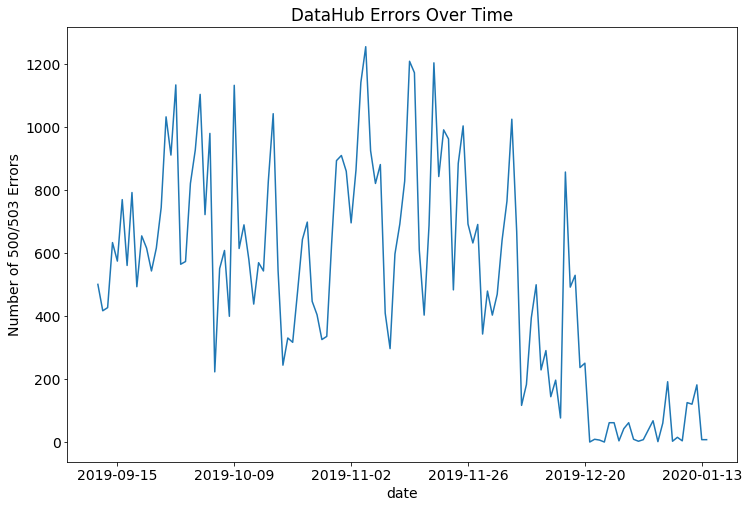

In [60]:
errors.groupby("date").sum().sort_index().reset_index().plot.line("date", "value", legend=False)
plt.xticks([dt.datetime(2019, 9, 15) + dt.timedelta(days=i//1) for i in np.linspace(0, 120, 6)])
plt.ylabel("Number of 500/503 Errors")
plt.title("DataHub Errors Over Time")
plt.savefig("../figures/nb04-errors-over-time.png")

In [65]:
num_errors = errors.groupby("timestamp").sum().reset_index()[["timestamp", "value"]].sort_values("timestamp")
num_errors.to_csv("../data/num_errors.csv", index=False)